### MLP for 55 Analytes Dataset
###  Author: Edgar Acuna
### Created: July 29,, 2021
### Reviewed: June 6, 2023

In [40]:
import scipy.io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mat = scipy.io.loadmat('C:/Users/Edgar Acuna/NRL2023/datasets/dataset55_release2.mat')

#### Reading the data (in Matlab' format)

In [41]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 14:13:11 2020'), ('__version__', '1.0'), ('__globals__', []), ('addedNoisePercent', array([[0.1],
       [0.5],
       [0. ],
       ...,
       [1. ],
       [0.1],
       [0. ]])), ('labels', array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)), ('massLoadings', array([[90.48134734],
       [90.48134734],
       [90.48134734],
       ...,
       [93.56603952],
       [93.56603952],
       [93.56603952]])), ('spectra', array([[0.01684698, 0.01575019, 0.01553012, ..., 0.01631328, 0.01523777,
        0.01464116],
       [0.01862416, 0.01217942, 0.02092375, ..., 0.01522821, 0.02158774,
        0.01224737],
       [0.01634829, 0.01627708, 0.01620733, ..., 0.01681628, 0.01679286,
        0.0167685 ],
       ...,
       [0.01777366, 0.02470746, 0.04042846, ..., 0.52899222, 0.53342443,
        0.54125978],
       [0.03112273, 0.02996503, 0.03299245, 

In [42]:
y=mat['labels']
y

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)

In [43]:
df=mat['spectra']
df=pd.DataFrame(df)
print(df.shape)

(49500, 1701)


In [44]:
ys=mat['substrateIDs']

In [45]:
subs=mat['substrateSpectra']
subs=pd.DataFrame(subs)
subs

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


### Data Preprocessing

In [46]:
dfset2=df.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]
#dfset1=pd.DataFrame(dfset1)
df['Analyte']=y
df['substrate']=ys
#hard_subs['subtrate']=ys

#### Substrate's effect correction

In [47]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [48]:
subs.shape

(9, 1701)

In [49]:
s1=subs.loc[0,:]
s2=subs.loc[1,:]
s3=subs.loc[2,:]
s4=subs.loc[3,:]
s5=subs.loc[4,:]
s6=subs.loc[5,:]
s7=subs.loc[6,:]
s8=subs.loc[7,:]
s9=subs.loc[8,:]

In [50]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(s1))/np.sum(np.array(s1)*np.array(s1)))*s1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(s2))/np.sum(np.array(s2)*np.array(s2)))*s2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(s3))/np.sum(np.array(s3)*np.array(s3)))*s3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(s4))/np.sum(np.array(s4)*np.array(s4)))*s4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(s5))/np.sum(np.array(s5)*np.array(s5)))*s5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(s6))/np.sum(np.array(s6)*np.array(s6)))*s6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(s7))/np.sum(np.array(s7)*np.array(s7)))*s7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(s8))/np.sum(np.array(s8)*np.array(s8)))*s8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(s9))/np.sum(np.array(s9)*np.array(s9)))*s9,axis=1)

In [51]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.003352,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003437,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.002536,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888


In [52]:
cent_subs['substrate']=ys
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,substrate
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034,1
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237,1
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209,1
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282,1
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888,1


In [53]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.003352,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003437,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.002536,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888


In [54]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.009607,0.004595,0.004153,0.001293,0.003809,0.005611,0.012284,0.000603,0.005059,0.005881,...,-0.017547,-0.025276,-0.020442,-0.011642,-0.012491,-0.017440,-0.019376,-0.018127,-0.023498,-0.026352
1,0.013683,-0.009277,0.023046,-0.040534,0.000598,0.018640,-0.010568,-0.011098,-0.022913,0.014546,...,-0.038060,0.017181,-0.033179,-0.005745,-0.009596,-0.004439,0.002042,-0.015857,0.007474,-0.026345
2,0.005920,0.006296,0.006659,0.007008,0.007325,0.007399,0.007152,0.006912,0.007250,0.008074,...,-0.018391,-0.018267,-0.018138,-0.018009,-0.017876,-0.017742,-0.017598,-0.017460,-0.017316,-0.017168
3,0.001720,0.014365,0.017369,0.013624,0.009649,0.002587,0.012490,-0.012215,-0.003470,-0.014777,...,-0.012008,-0.034912,-0.001307,-0.010292,-0.036719,-0.029583,-0.016964,-0.019143,-0.011705,-0.039219
4,0.014017,0.036012,0.006521,0.020120,0.016342,0.011801,0.006702,-0.017573,0.022017,0.019119,...,-0.012055,0.004192,-0.031434,-0.002269,-0.015060,-0.048664,-0.015689,-0.009685,-0.000306,-0.014363


In [55]:
b1['substrate']=ys
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,substrate
0,0.009607,0.004595,0.004153,0.001293,0.003809,0.005611,0.012284,0.000603,0.005059,0.005881,...,-0.025276,-0.020442,-0.011642,-0.012491,-0.017440,-0.019376,-0.018127,-0.023498,-0.026352,1
1,0.013683,-0.009277,0.023046,-0.040534,0.000598,0.018640,-0.010568,-0.011098,-0.022913,0.014546,...,0.017181,-0.033179,-0.005745,-0.009596,-0.004439,0.002042,-0.015857,0.007474,-0.026345,1
2,0.005920,0.006296,0.006659,0.007008,0.007325,0.007399,0.007152,0.006912,0.007250,0.008074,...,-0.018267,-0.018138,-0.018009,-0.017876,-0.017742,-0.017598,-0.017460,-0.017316,-0.017168,1
3,0.001720,0.014365,0.017369,0.013624,0.009649,0.002587,0.012490,-0.012215,-0.003470,-0.014777,...,-0.034912,-0.001307,-0.010292,-0.036719,-0.029583,-0.016964,-0.019143,-0.011705,-0.039219,1
4,0.014017,0.036012,0.006521,0.020120,0.016342,0.011801,0.006702,-0.017573,0.022017,0.019119,...,0.004192,-0.031434,-0.002269,-0.015060,-0.048664,-0.015689,-0.009685,-0.000306,-0.014363,1


In [56]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
#print(len(y))

### Applying the MLP Algorithm
#### The MLP architecture consists of two hidden layers, the first one with 300 neurons and the second one with 200 neurons. A dropout ratee of .30 was considered.

In [57]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import time

In [58]:
# Configuration options
feature_vector_length = 1701
num_classes = 55
X=b1.iloc[:,0:1701]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=0)
# Convert target classes to categorical ones
ytrain=Y_train-1
ytest=Y_test-1
Y_train = to_categorical(ytrain, num_classes)
Y_test = to_categorical(ytest, num_classes)
print('Train dimension:')
print(X_train.shape)
print('Test dimension:')
print(X_test.shape)

Train dimension:
(39600, 1701)
Test dimension:
(9900, 1701)


In [59]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (1701,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 1701)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               510600    
                                                                 
 dense_7 (Dense)             (None, 200)               60200     
                                                                 
 dense_8 (Dense)             (None, 55)                11055     
                                                                 
Total params: 581,855
Trainable params: 581,855
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Configure the model and start training
import time
start_time = time.time()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/50
212/212 [==============================] - 3s 11ms/step - loss: 2.4100 - accuracy: 0.4545 - val_loss: 1.1090 - val_accuracy: 0.7539
Epoch 2/50
212/212 [==============================] - 2s 9ms/step - loss: 1.0074 - accuracy: 0.7586 - val_loss: 0.8676 - val_accuracy: 0.7963
Epoch 3/50
212/212 [==============================] - 2s 9ms/step - loss: 0.8053 - accuracy: 0.8013 - val_loss: 0.8045 - val_accuracy: 0.8067
Epoch 4/50
212/212 [==============================] - 2s 11ms/step - loss: 0.6974 - accuracy: 0.8238 - val_loss: 0.7817 - val_accuracy: 0.8048
Epoch 5/50
212/212 [==============================] - 2s 11ms/step - loss: 0.6149 - accuracy: 0.8407 - val_loss: 0.7622 - val_accuracy: 0.8104
Epoch 6/50
212/212 [==============================] - 2s 11ms/step - loss: 0.5535 - accuracy: 0.8527 - val_loss: 0.7583 - val_accuracy: 0.8134
Epoch 7/50
212/212 [==============================] - 2s 11ms/step - loss: 0.4899 - accuracy: 0.8671 - val_loss: 0.7651 - val_accuracy: 0.8105
E

In [61]:
print("Training time:---  %s seconds ---" % (time.time() - start_time))
#Test the model after training
start_time=time.time()
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("Testing time:--- %s seconds ---" % (time.time() - start_time))

Training time:---  114.59527373313904 seconds ---
310/310 [==============================] - 1s 2ms/step - loss: 1.0999 - accuracy: 0.7975
[1.099882960319519, 0.79747474193573]
Test results - Loss: 1.099882960319519 - Accuracy: 0.79747474193573%
Testing time:--- 0.9731838703155518 seconds ---


In [62]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

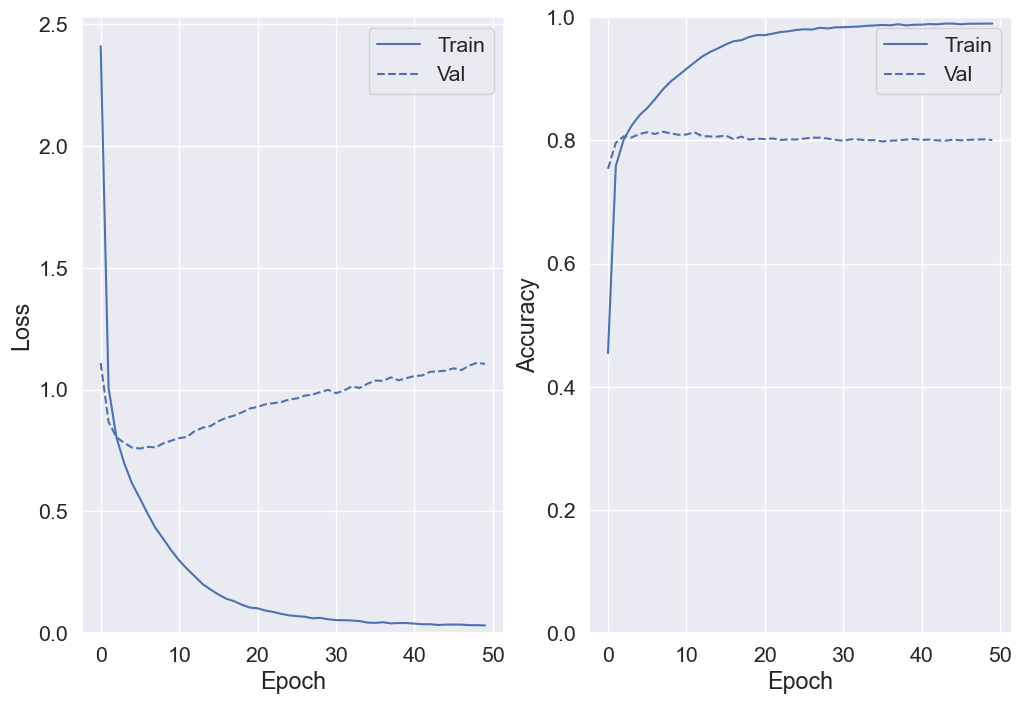

In [63]:
plot_metrics(baseline_history)

In [64]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(Y_train)
test_labels=np.array(Y_test)
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
print('Probability of classification',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(ytrain, predict_classes1, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(ytest, predict_classes, average="weighted")
print('f1_scores in training set',f1_train,'f1_scores in testing set',f1_test)

310/310 [==============================] - 1s 2ms/step
Probability of classification 0.9064646464646464
1238/1238 [==============================] - 2s 2ms/step
f1_scores in training set 0.9601906361181299 f1_scores in testing set 0.7985932328670575


In [65]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(ytest, predict_classes))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       179
           1       0.67      0.76      0.71       172
           2       0.80      0.87      0.83       194
           3       0.72      0.80      0.76       174
           4       0.86      0.84      0.85       183
           5       0.82      0.86      0.84       189
           6       0.91      0.84      0.87       172
           7       0.86      0.79      0.82       196
           8       0.75      0.87      0.81       174
           9       0.67      0.85      0.75       163
          10       0.93      0.77      0.84       185
          11       0.89      0.81      0.85       183
          12       0.87      0.80      0.83       185
          13       0.80      0.77      0.78       193
          14       0.81      0.76      0.78       183
          15       0.86      0.75      0.80       194
          16       0.79      0.82      0.80       158


In [66]:
cm=confusion_matrix(ytest, predict_classes)
#print(cm)
good=np.diag(cm)/np.unique(ytest,return_counts=True)[1]
print(good)

[0.80446927 0.75581395 0.86597938 0.79885057 0.83606557 0.85714286
 0.84302326 0.78571429 0.86781609 0.85276074 0.77297297 0.81420765
 0.8        0.77202073 0.75956284 0.75257732 0.8164557  0.80952381
 0.85227273 0.82162162 0.83146067 0.82424242 0.81609195 0.83798883
 0.76470588 0.80120482 0.63681592 0.76433121 0.70408163 0.71341463
 0.73224044 0.80555556 0.72988506 0.77368421 0.87640449 0.91794872
 0.77840909 0.78612717 0.72560976 0.72670807 0.90449438 0.71717172
 0.81111111 0.83522727 0.89940828 0.80225989 0.78172589 0.83977901
 0.81005587 0.73684211 0.85795455 0.86407767 0.79005525 0.74175824
 0.6961326 ]


#### Analytes with low correct classification rate: #55, #27, #39, #30, #54

In [67]:
df_cm = pd.DataFrame(cm, range(55), range(55))
df_cm.tail()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
50,1,1,0,0,1,1,1,0,0,0,...,3,1,0,0,0,151,0,0,1,0
51,1,4,0,1,0,1,0,1,1,1,...,2,1,0,0,0,0,178,1,1,2
52,1,3,1,1,1,0,0,1,0,2,...,2,0,1,2,0,0,0,143,0,2
53,0,0,0,2,1,1,0,0,1,1,...,3,1,0,0,0,0,0,0,135,1
54,0,2,3,1,0,2,2,0,3,0,...,1,0,0,2,1,1,0,2,1,126


#### Visualizing the confusion matrix

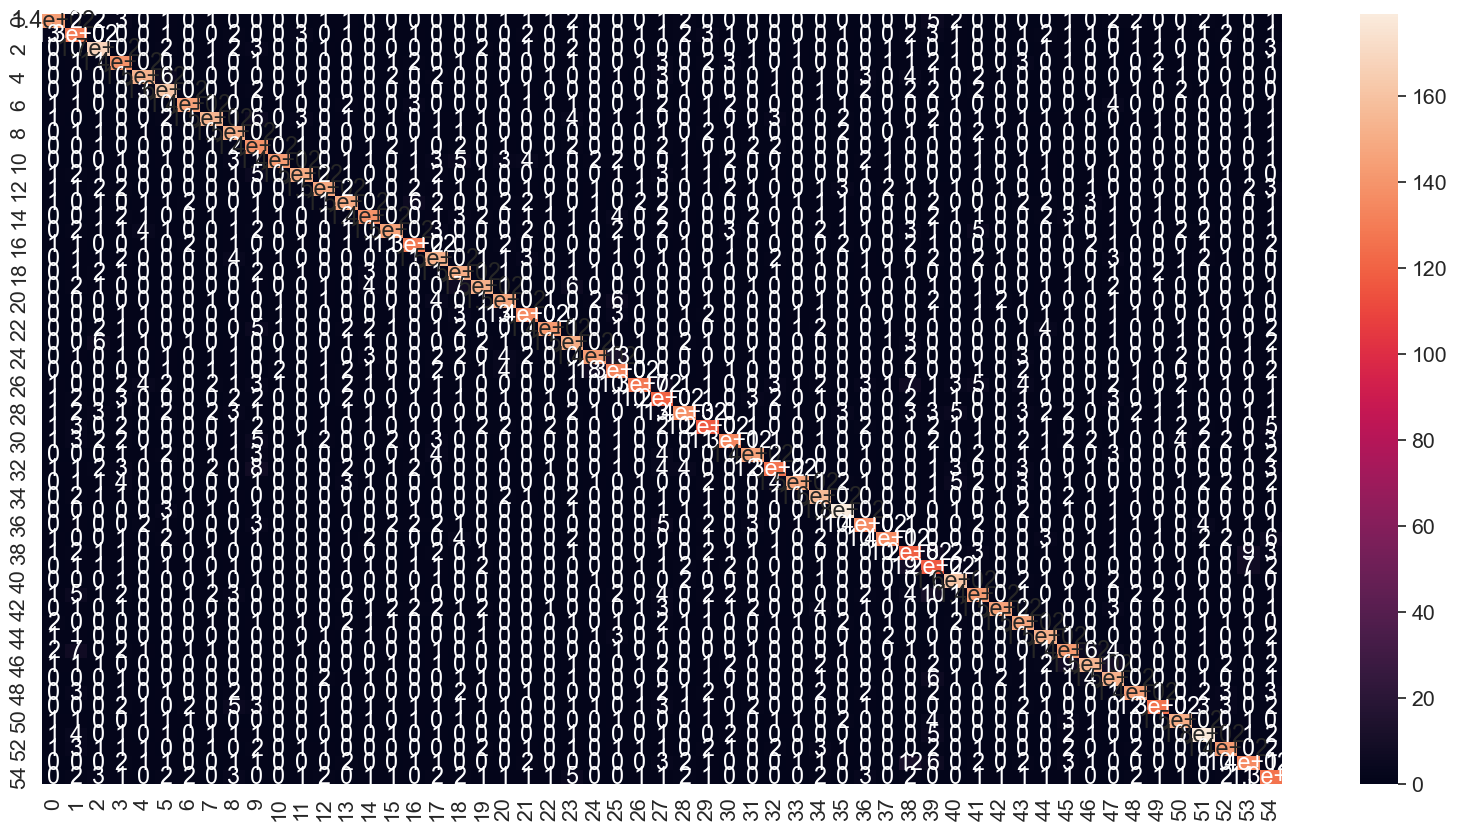

In [68]:
import seaborn as sn
plt.figure(figsize=(20,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

#### Plotting the ROC curve and comouting the AUC for each of the 55 analytes

ROC AUC score: 0.8969780442448136


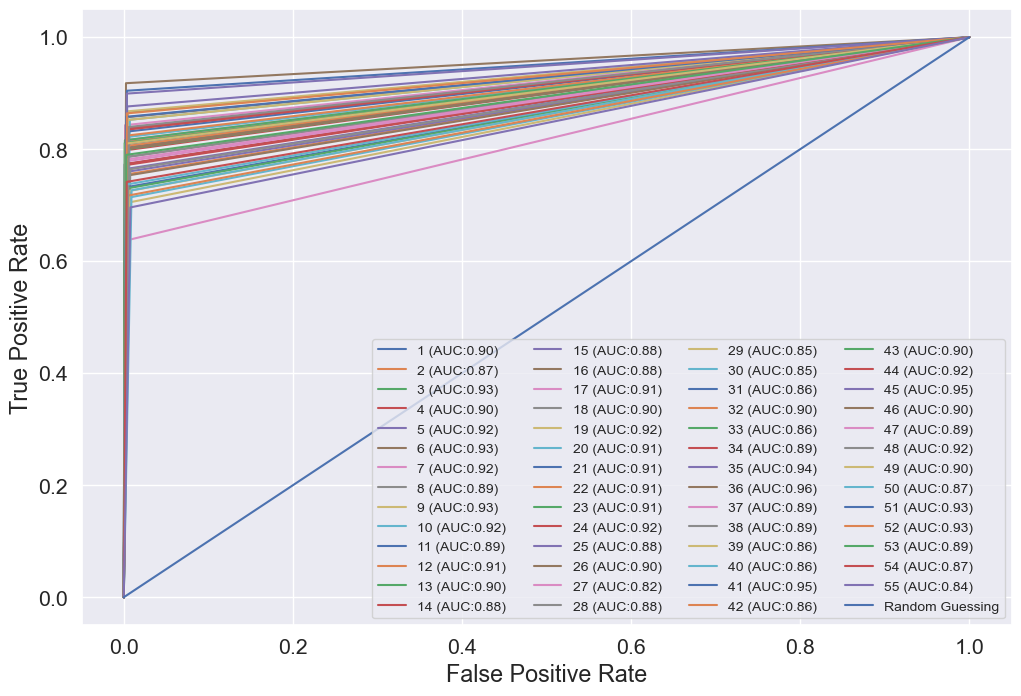

In [69]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= range(55)

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label+1, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(ytest, predict_classes))

c_ax.legend(loc=4,ncol=4,fontsize=10)
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

### Applying  MLP to 100 PCA

In [70]:
from sklearn.decomposition import PCA
dfset3=b1.copy()
pca = PCA(n_components=100)
dfset3.columns = dfset3.columns.astype(str) 
pca_result = pca.fit_transform(dfset3)

In [71]:
# Configuration options
feature_vector_length = 100
num_classes = 55
X=pca_result
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=0)
# Convert target classes to categorical ones
Y_train=Y_train-1
Y_test=Y_test-1
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
print('Train dimension:')
print(X_train.shape)
print('Test dimension:')
print(X_test.shape)

Train dimension:
(39600, 100)
Test dimension:
(9900, 100)


In [72]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')
# Create the model
model = Sequential()
#model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(20, input_shape=input_shape, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (100,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                2020      
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 55)                1155      
                                                                 
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Configure the model and start training
import time
start_time = time.time()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
495/495 [==============================] - 2s 2ms/step - loss: 3.9073 - accuracy: 0.0778 - val_loss: 3.5140 - val_accuracy: 0.2100
Epoch 2/100
495/495 [==============================] - 1s 2ms/step - loss: 2.6567 - accuracy: 0.4275 - val_loss: 2.0246 - val_accuracy: 0.5725
Epoch 3/100
495/495 [==============================] - 1s 1ms/step - loss: 1.7347 - accuracy: 0.6358 - val_loss: 1.5535 - val_accuracy: 0.6655
Epoch 4/100
495/495 [==============================] - 1s 1ms/step - loss: 1.4384 - accuracy: 0.6859 - val_loss: 1.3769 - val_accuracy: 0.6942
Epoch 5/100
495/495 [==============================] - 1s 2ms/step - loss: 1.3023 - accuracy: 0.7080 - val_loss: 1.2758 - val_accuracy: 0.7184
Epoch 6/100
495/495 [==============================] - 1s 2ms/step - loss: 1.2199 - accuracy: 0.7235 - val_loss: 1.2112 - val_accuracy: 0.7280
Epoch 7/100
495/495 [==============================] - 1s 2ms/step - loss: 1.1611 - accuracy: 0.7366 - val_loss: 1.1598 - val_accuracy: 0.7356

Epoch 58/100
495/495 [==============================] - 1s 1ms/step - loss: 0.7079 - accuracy: 0.8197 - val_loss: 0.7998 - val_accuracy: 0.7970
Epoch 59/100
495/495 [==============================] - 1s 2ms/step - loss: 0.7070 - accuracy: 0.8191 - val_loss: 0.7987 - val_accuracy: 0.7977
Epoch 60/100
495/495 [==============================] - 1s 2ms/step - loss: 0.7056 - accuracy: 0.8190 - val_loss: 0.7958 - val_accuracy: 0.7971
Epoch 61/100
495/495 [==============================] - 1s 1ms/step - loss: 0.7041 - accuracy: 0.8195 - val_loss: 0.7939 - val_accuracy: 0.7992
Epoch 62/100
495/495 [==============================] - 1s 2ms/step - loss: 0.7021 - accuracy: 0.8206 - val_loss: 0.7909 - val_accuracy: 0.7992
Epoch 63/100
495/495 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.8205 - val_loss: 0.7962 - val_accuracy: 0.7973
Epoch 64/100
495/495 [==============================] - 1s 1ms/step - loss: 0.6997 - accuracy: 0.8201 - val_loss: 0.7954 - val_accuracy:

In [74]:
# Test the model after training
print("Training time:---  %s seconds ---" % (time.time() - start_time))
start_time=time.time()
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("Testing time:--- %s seconds ---" % (time.time() - start_time))

Training time:---  78.41648173332214 seconds ---
310/310 [==============================] - 0s 922us/step - loss: 0.7686 - accuracy: 0.8082
[0.7685592174530029, 0.8081818222999573]
Test results - Loss: 0.7685592174530029 - Accuracy: 0.8081818222999573%
Testing time:--- 0.3438293933868408 seconds ---
